## Name : Omkar Thawakar
Reg No : 2015BCS003 , Roll No : A-08
##### Aim : Implement multilayer neural network to classify digits

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import os
import struct
import time

In [5]:
def load_mnist(path, kind='train'):
    labels_path = os.path.join(path, 
                               '%s-labels-idx1-ubyte' 
                                % kind)
    images_path = os.path.join(path, 
                               '%s-images-idx3-ubyte' 
                               % kind)
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', 
                                 lbpath.read(8))
        labels = np.fromfile(lbpath, 
                             dtype=np.uint8)
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", 
                                               imgpath.read(16))
        images = np.fromfile(imgpath, 
                    dtype=np.uint8).reshape(len(labels), 784)
    return images, labels

In [6]:
images , labels = load_mnist('/Users/omkarchakradharthawakar/NN/mnist/data')

In [9]:
images[:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [10]:
labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [44]:
data , d , test = [],[],[]
for i,j in zip(images,labels):
    if len(data)<=10:
        if j in test:
            pass
        else:
            data.append(list(i))
            tmp = [0 for i in range(10)]
            tmp[j]=1
            d.append(tmp)
            test.append(j)
    

In [70]:
class NN:
    def __init__(self,layers,l1_neurons,l2_neurons,eta=0.1):
        self.layers = layers
        self.l1_n = l1_neurons
        self.l2_n = l2_neurons
        self.eta=eta
        
    def init_weights(self,X):
        self.w = np.random.random((self.l2_n,self.l1_n+1))
        self.v = np.random.random((self.l1_n,np.array(X).shape[1]+1))
        #print(self.v.shape ,'  ',self.w.shape)
        
    def aug_inputs(self,X):
        for x in X:
            x.insert(0,-1)
        return X
    
    def train(self,X,outputs,epochs):
        self.v = self.v
        self.w =self.w
        #print("Initial Weights : ",self.weights)
        X = self.aug_inputs(X)
        #print("Augmented input pattern : ",X)
        self.error_ = []
        epoch=1
        p = 1
        for i in range(epochs):
            #print("Epoch : ",epoch)
            err=0
            #calculate the delta for hiden layers
            for x,d in zip(X,outputs):
                #print("Step : ",p)
                #calculate output of hidden layer
                #print('For hidden layer ......')
                out = self.predict(x,self.v)
                #print("For input pattern : ",x)
                #print("Output of hidden layer : ",out)
                
                #calculate output of output layer
                #print('for output layer....')
                out_inputs = np.insert(out,0,-1) #augmented input pattern of output layer
                out_out = self.predict(out_inputs,self.w)
                #print("output of output layer : ",out_out)
                
                #Calculate Delta(Error signa term) for output layer
                del_w = []

                for d_,o_ in zip(d,out_out):
                    del_w.append(((d_-o_)*o_*(1-o_)))
                #print("Error Signal term of output layer : ",del_w)
                #print("shape of del_w : ",np.array(del_w).shape)
                
                #Calculate Delta(Error signa term) for hidden layer
                del_v = []
                for o_ in out:
                    for i in range(len(self.w)):
                        #for j in range(len(self.w[i])):
                        temp_sum=del_w*self.w[:,i]
                        #print(np.array(temp_sum).shape)
                        #print(o_,temp_sum)
                    del_v.append(o_*(1-o_)*sum(temp_sum))
                #print("Error Signal Term of Hidden layer : ",del_v)
                #print("shape of del_v : ",np.array(del_v).shape)
                
                #adjust the weight of output layers
                delta_w = []
                for _ in del_w:
                    delta_w.append(self.eta*_*np.array(out_inputs))
                #print("$$ : ",delta_w)
                #print("shape of delta_w : ",np.array(delta_w).shape)
                for _ in range(len(self.w)):
                    self.w[i] = self.w[i] + delta_w[i]   
                #print("Adjusted weights of output layer : ",self.w)
                
                #adjust the weight of hidden layers
                delta_v = []
                for _ in del_v:
                    delta_v.append([(self.eta*_)*i for i in x])
                #print("$$ : ",delta_v)
                #print("shape of delta_v : ",np.array(delta_v).shape)
                #print(self.v)
                self.v = self.v + np.array(delta_v)   
                #print('-',self.v)
                #print("Adjusted weights of hidden layer : ",self.w)
                
                err = d-out_out   
            
                p+=1
                
            self.error_.append(sum(np.array(err)**2)/2)    
            epoch+=1
            #print("weights of hidden layer : ",self.v)
            #print("weights of output layer : ",self.w)
            #print("Error : ",sum(np.array(err)**2)/2)
            #print('='*100)
            if self.error_[-1] <=0.01 :
                break 
                
        print("Training Steps Required are {} .".format(p))
        print('Final Error : ',self.error_[-1])
        
        return self
                                                                           
    def get_weights(self):
        return self.weights
                                                                           
    def net_input(self,X,weights):
        return np.dot(weights,X)
    
    def activation(self,net):
        return 1/(1+np.exp(-net))
        
    def gradient(self,out):
        return out*(1-out)
    
    def predict(self,x,weights):
        #print("Net : ",self.net_input(np.array(x),weights))
        net = self.net_input(np.array(x),weights)
        return self.activation(net)
        

In [106]:
data , d , test = [],[],[]
for i,j in zip(images,labels):
    if len(data)<=20:
        if j in test:
            data.append(list(i))
            tmp = [0 for i in range(10)]
            tmp[j]=1
            d.append(tmp)
            test.append(j)
        else:
            data.append(list(i))
            tmp = [0 for i in range(10)]
            tmp[j]=1
            d.append(tmp)
            test.append(j)

nn = NN(2,50,10,eta=0.5)
nn.init_weights(data)
#print("Initial Weights of hidden layer are : ",nn.v)
#print("Initial Weights of output layer are : ",nn.w)
start = time.time()
nn.train(data,d,1000)
print("Time required for training {} seconds. ",time.time()-start)

Training Steps Required are 21001 .
Final Error :  3.99988108852
Time required for training {} seconds.  213.5882532596588


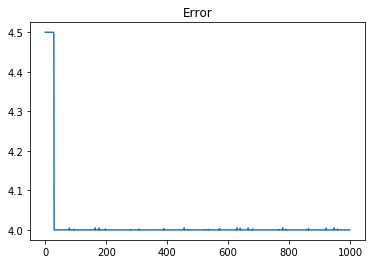

In [107]:
plt.plot(nn.error_)
plt.title('Error')
plt.show()

In [87]:
for i,j in zip(X,d):
    plt.scatter(i[1],i[2],c='k' ,marker='x' if j==[1]  else 'o' )
    
x = np.arange(-10,15)
c1,a1,b1 = nn.v[0]
y1 = (c1-a1*x)/b1
plt.plot(x,y1,c='g',label='{}x+{}y-{}=0'.format(a1,b1,c1))

c2,a2,b2 = nn.v[1]
y2 = (c2-a2*x)/b2
plt.plot(x,y2,c='b',label='{}x+{}y-{}=0'.format(a2,b2,c2))

plt.fill_between(x,y1,y2,color='green',alpha=0.4,label='class 1')
plt.fill_between(x,y2,-2,color='yellow',alpha=0.4,label='class 0')
plt.fill_between(x,y1,2,color='yellow',alpha=0.4)

plt.ylim([-2,2])
plt.xlim([-2,2])
plt.legend()
plt.show()

NameError: name 'X' is not defined

### After training weights of hidden layer

In [88]:
nn.v

array([[ 0.41430622,  0.53209704,  0.5471202 , ...,  0.06489954,
         0.57481145,  0.41177709],
       [ 0.72276174,  0.3239302 ,  0.99124838, ...,  0.46855524,
         0.84647222,  0.18512392],
       [ 0.89469351,  0.94680868,  0.36493098, ...,  0.13262263,
         0.5253251 ,  0.70007562],
       ..., 
       [ 0.28398833,  0.37261185,  0.09982285, ...,  0.78721654,
         0.20602342,  0.15001274],
       [ 0.35706207,  0.35027744,  0.757799  , ...,  0.65098901,
         0.07419942,  0.44905928],
       [ 0.90434936,  0.14128345,  0.08782541, ...,  0.37765411,
         0.60875508,  0.50514086]])

### After training weights of output layer

In [89]:
nn.w

array([[ 0.04816786,  0.97721559,  0.61464202, ...,  0.47740747,
         0.99920166,  0.67498264],
       [ 0.97018825,  0.71804964,  0.1405647 , ...,  0.47684842,
         0.8049822 ,  0.75532606],
       [ 0.64862337,  0.45507168,  0.23467725, ...,  0.18007904,
         0.54929204,  0.54444751],
       ..., 
       [ 0.14326675,  0.32667825,  0.35779881, ...,  0.85016253,
         0.49379826,  0.69277037],
       [ 0.09606857,  0.84460555,  0.03871215, ...,  0.97857064,
         0.82485755,  0.39839814],
       [ 0.80464119,  0.97320437,  0.83500125, ...,  0.56271742,
         0.6038375 ,  0.46413495]])

### Error of Network after training for 10 epochs

In [90]:
nn.error_[-1]

4.5

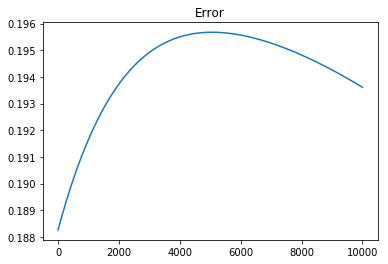

### Visualization of Decision Boundaries

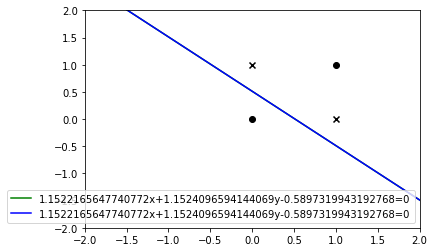

In [35]:
np.multiply(0.43,np.array([1,2,3]))

array([ 0.43,  0.86,  1.29])

In [36]:
*0.43*np.array([1,2,3])

array([ 0.43,  0.86,  1.29])